# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Read and display data

In [2]:
df = pd.read_csv("D:\Files\Downloads\churn.csv")
Markdown(" * Data set consists of %d cases (rows) with %s attributes (cols) and a single target." % (df.shape[0], df.shape[1]-1))

 * Data set consists of 3333 cases (rows) with 20 attributes (cols) and a single target.

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Fix column names

In [4]:
names = df.columns.tolist()
def fixName(s):
    for a,b in {"'":"", " ": "_", "?" : "", "CustServ":"Cust_Serv"}.items():
        s = s.replace(a, b)
    return s

mapping = {c:fixName(c) for c in names}
mapping

{'State': 'State',
 'Account Length': 'Account_Length',
 'Area Code': 'Area_Code',
 'Phone': 'Phone',
 "Int'l Plan": 'Intl_Plan',
 'VMail Plan': 'VMail_Plan',
 'VMail Message': 'VMail_Message',
 'Day Mins': 'Day_Mins',
 'Day Calls': 'Day_Calls',
 'Day Charge': 'Day_Charge',
 'Eve Mins': 'Eve_Mins',
 'Eve Calls': 'Eve_Calls',
 'Eve Charge': 'Eve_Charge',
 'Night Mins': 'Night_Mins',
 'Night Calls': 'Night_Calls',
 'Night Charge': 'Night_Charge',
 'Intl Mins': 'Intl_Mins',
 'Intl Calls': 'Intl_Calls',
 'Intl Charge': 'Intl_Charge',
 'CustServ Calls': 'Cust_Serv_Calls',
 'Churn?': 'Churn'}

In [5]:
df.rename(columns=mapping, inplace=True)
df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,Cust_Serv_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Clean Data

In [6]:
df.Intl_Plan = df.Intl_Plan.map({"yes":1, "no":0})
df.VMail_Plan = df.VMail_Plan.apply(lambda x: int(x=='yes'))
df.Churn = df.Churn.apply(lambda x: int(x=='True.'))

In [7]:
df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,Cust_Serv_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Churn Count Plot

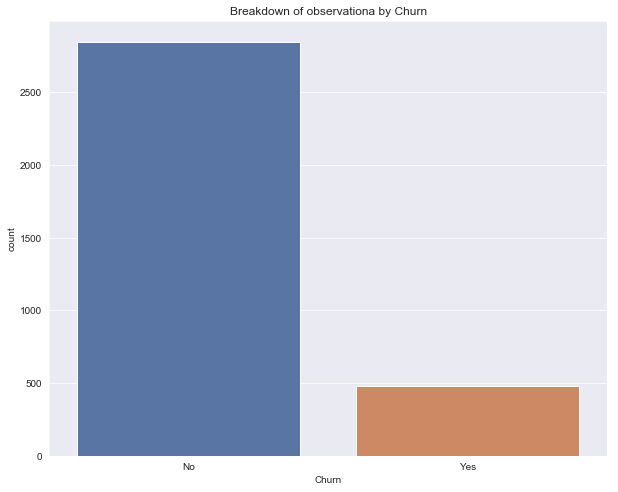

In [8]:
sns.set({'figure.figsize':(10, 8)})
ax = sns.countplot(x="Churn", data=df)
ax.set_title("Breakdown of observationa by Churn")
ax.set_xticklabels(["No", "Yes"])
plt.show()

In [9]:
Markdown("# Catplot Target = Churn, y = Area code, intl plan, vmail plan")

# Catplot Target = Churn, y = Area code, intl plan, vmail plan

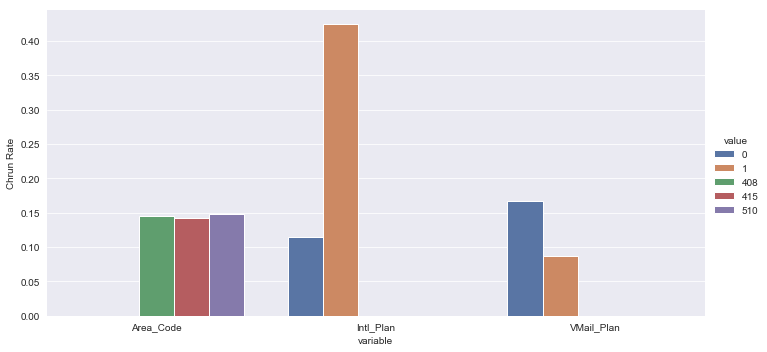

In [10]:
df1 = pd.melt(df, id_vars=["Churn"], value_vars=["Area_Code", "Intl_Plan", "VMail_Plan"], var_name="variable")
ax = sns.catplot(x="variable", y="Churn", hue="value", aspect=2, data=df1, kind="bar", ci=None)
ax.despine(left=True)
ax.set_ylabels("Chrun Rate")
plt.show()

In [11]:
Markdown("# Count and Bar plot for churn and state")

# Count and Bar plot for churn and state

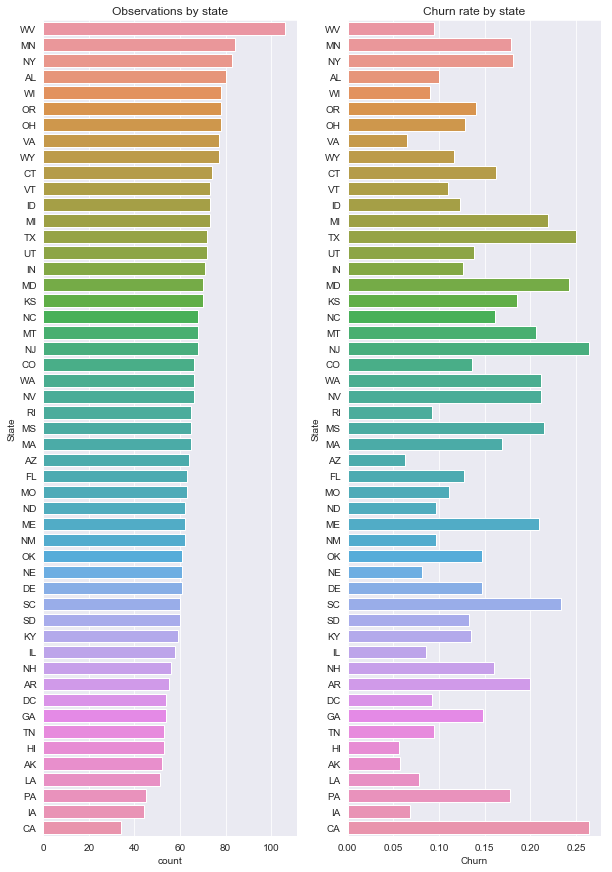

In [12]:
fig = plt.figure(figsize=(10, 15))
s1 = df.State.value_counts()
ax = plt.subplot(1, 2, 1)
ax1 = sns.countplot(y="State", data=df, order=s1.index)
ax1.set_title("Observations by state")

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="Churn", y="State", data=df, ci=None, order=s1.index)
ax2.set_title("Churn rate by state")
plt.show()

In [13]:
df.Account_Length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account_Length, dtype: float64

In [51]:
Markdown("# Distribution of Account length")

# Distribution of Account length

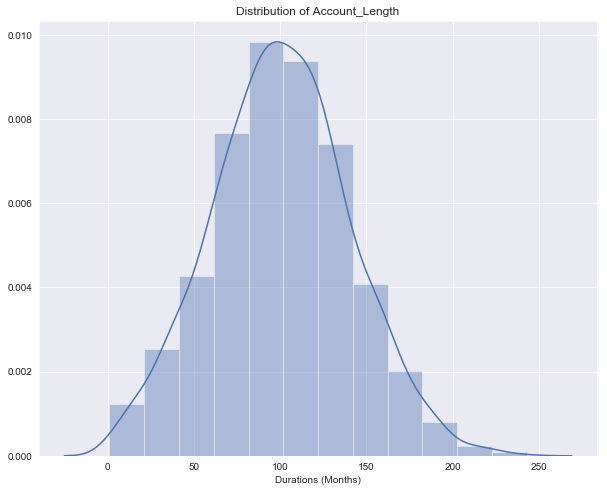

In [42]:
ax = sns.distplot((tuple(df.Account_Length)), bins=12)
ax.set_title("Distribution of Account_Length")
ax.set_xlabel("Durations (Months)")
plt.show()

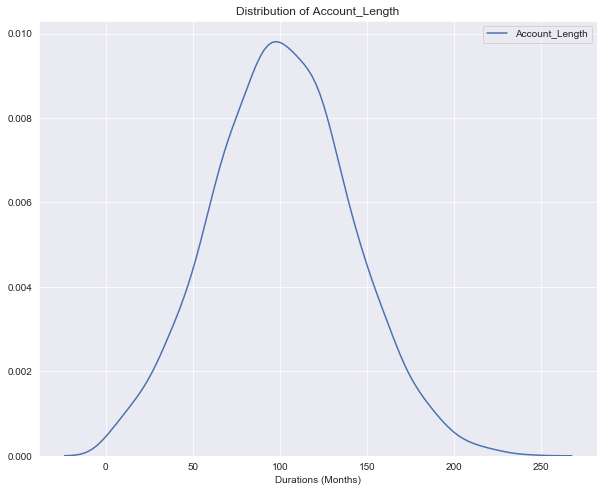

In [16]:
ax = sns.kdeplot(df.Account_Length)
ax.set_title("Distribution of Account_Length")
ax.set_xlabel("Durations (Months)")
plt.show()

In [52]:
Markdown("# Boxplot of Account length")

# Boxplot of Account length

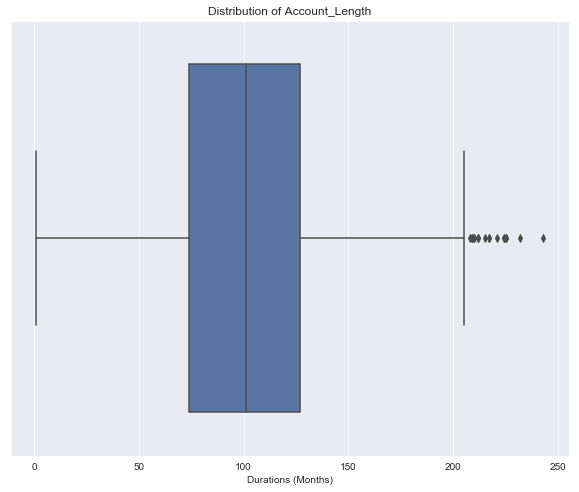

In [17]:
ax = sns.boxplot(df.Account_Length)
ax.set_title("Distribution of Account_Length")
ax.set_xlabel("Durations (Months)")
plt.show()

In [53]:
Markdown("# Violin plot of Account Length")

# Violin plot of Account Length

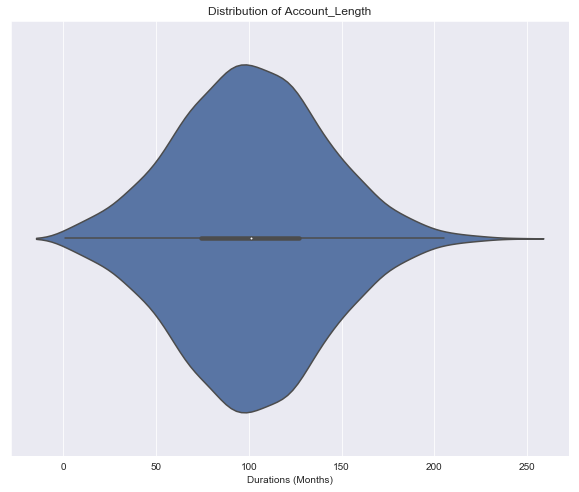

In [18]:
ax = sns.violinplot(df.Account_Length)
ax.set_title("Distribution of Account_Length")
ax.set_xlabel("Durations (Months)")
plt.show()

In [54]:
Markdown("# Catplot of Account length")

# Catplot of Account length

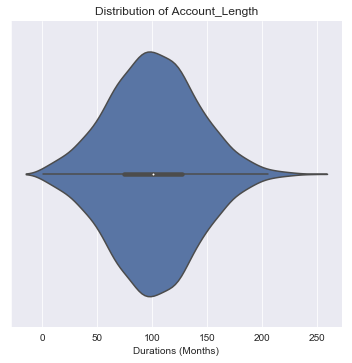

In [19]:
g = sns.catplot(x="Account_Length", data=df, kind="violin")
g.ax.set_title("Distribution of Account_Length")
g.ax.set_xlabel("Durations (Months)")
plt.show()

In [55]:
Markdown("# KDE plot of Account length of who did/ didn't churn")

# KDE plot of Account length of who did/ didn't churn

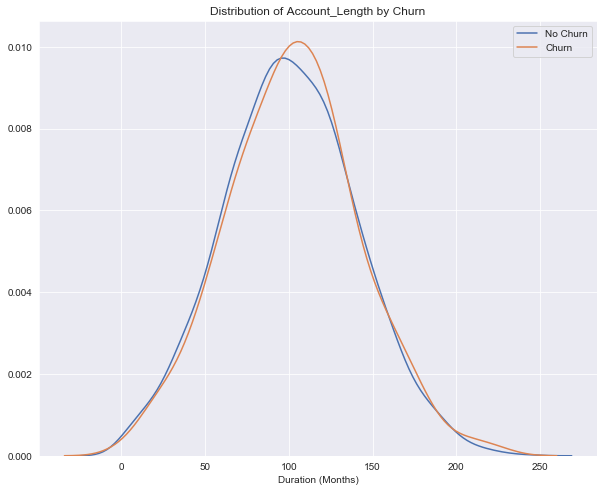

In [20]:
fig, ax = plt.subplots()
sns.kdeplot(df[df.Churn==0].Account_Length, label="No Churn")
sns.kdeplot(df[df.Churn==1].Account_Length, label="Churn")
ax.set_title("Distribution of Account_Length by Churn")
ax.set_xlabel("Duration (Months)")
plt.show()

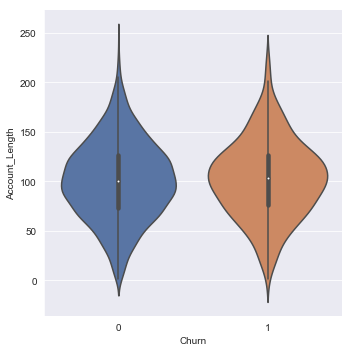

In [21]:
g = sns.catplot(x="Churn", y="Account_Length", data=df, kind="violin")
plt.show()

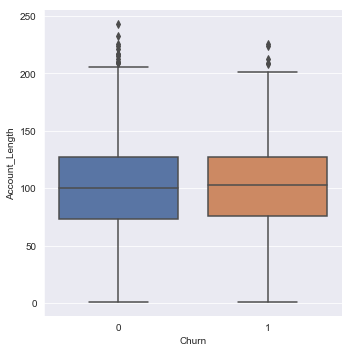

In [22]:
g = sns.catplot(x="Churn", y="Account_Length", data=df, kind="box")
plt.show()

In [23]:
pd.pivot_table(df, values="Churn", index="Area_Code", aggfunc=[len, np.sum, np.mean])

,len,sum,mean
,Churn,Churn,Churn
Area_Code,,,
408,838,122,0.145585
415,1655,236,0.142598
510,840,125,0.148810


In [24]:
pt = pd.pivot_table(df, values="Churn", index=['Intl_Plan'], aggfunc=[len, np.sum, np.mean])
pt

,len,sum,mean
,Churn,Churn,Churn
Intl_Plan,,,
0,3010,346,0.114950
1,323,137,0.424149


In [25]:
pt.at[0, ("sum", "Churn")]

346

In [26]:
pd.crosstab(df.Intl_Plan, df.Churn, margins=True)

Churn,0,1,All
Intl_Plan,,,
0,2664,346,3010
1,186,137,323
All,2850,483,3333


In [27]:
tab = pd.crosstab(df.Intl_Plan, df.Churn, margins=True)
tab

Churn,0,1,All
Intl_Plan,,,
0,2664,346,3010
1,186,137,323
All,2850,483,3333


In [28]:
df2 = pd.pivot_table(df, values="Churn", index=['Cust_Serv_Calls'], aggfunc=["count", "sum", "mean"])
df2

,count,sum,mean
,Churn,Churn,Churn
Cust_Serv_Calls,,,
0,697,92,0.131994
1,1181,122,0.103302
2,759,87,0.114625
3,429,44,0.102564
4,166,76,0.457831
5,66,40,0.606061
6,22,14,0.636364
7,9,5,0.555556


In [29]:
df2 = df2.reset_index()
df2

,Cust_Serv_Calls,count,sum,mean
,,Churn,Churn,Churn
0,0,697,92,0.131994
1,1,1181,122,0.103302
2,2,759,87,0.114625
3,3,429,44,0.102564
4,4,166,76,0.457831
5,5,66,40,0.606061
6,6,22,14,0.636364
7,7,9,5,0.555556
8,8,2,1,0.500000


In [30]:
df2.columns = df2.columns.droplevel(1)
df2

,Cust_Serv_Calls,count,sum,mean
0,0,697,92,0.131994
1,1,1181,122,0.103302
2,2,759,87,0.114625
3,3,429,44,0.102564
4,4,166,76,0.457831
5,5,66,40,0.606061
6,6,22,14,0.636364
7,7,9,5,0.555556
8,8,2,1,0.500000
9,9,2,2,1.000000


In [31]:
index = ['State',
'Account_Length',
'Area_Code',
'Phone',
'Intl_Plan',
'VMail_Plan',
'VMail_Message',
'Day_Mins',
'Day_Calls',
'Day_Charge',
'Eve_Mins',
'Eve_Calls',
'Eve_Charge',
'Night_Mins',
'Night_Calls',
'Night_Charge',
'Intl_Mins',
'Intl_Calls',
'Intl_Charge',
'Cust_Serv_Calls',
'Churn']

In [32]:
attributes_usage = [c for c in df.columns if c[0:3] in ["Day", "Eve", "Nig", "Int"] and c!="Intl_Plan"]
df1 = df[attributes_usage]
df1.head(2)

,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7


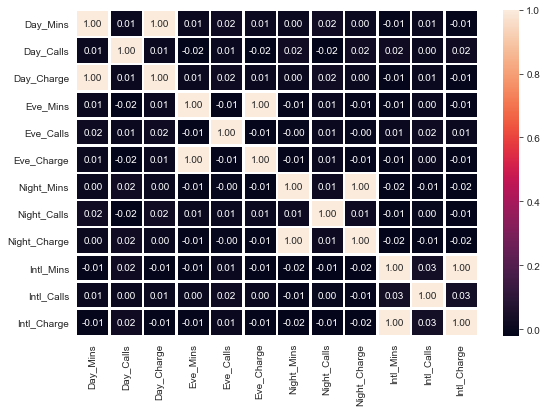

In [33]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

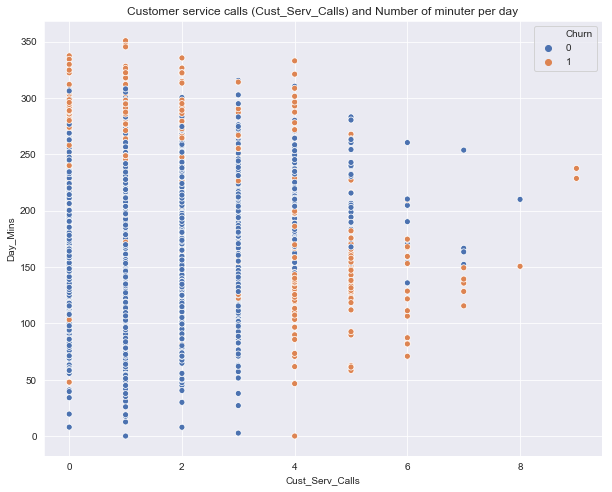

In [34]:
ax = sns.scatterplot(data=df, x="Cust_Serv_Calls", y="Day_Mins", hue="Churn")
ax.set_title("Customer service calls (Cust_Serv_Calls) and Number of minuter per day")
plt.show()

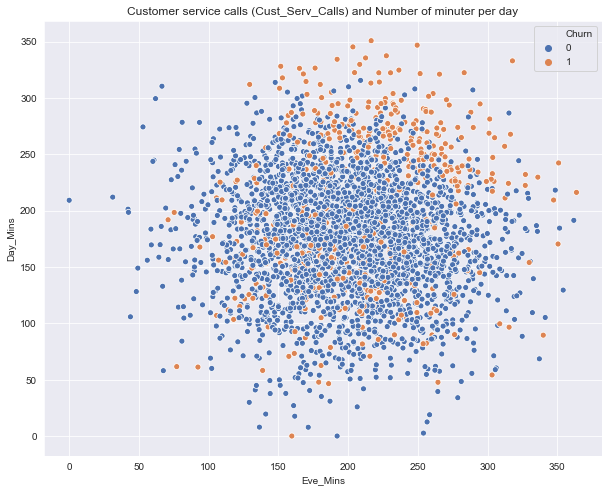

In [35]:
ax = sns.scatterplot(data=df, x="Eve_Mins", y="Day_Mins", hue="Churn")
ax.set_title("Customer service calls (Cust_Serv_Calls) and Number of minuter per day")
plt.show()

* No missing values
* some varibales are perfectly correlated => need to eleminate from model
* State is linked to Churn

In [36]:
from sklearn.model_selection import train_test_split
df_all = df

df_train, df_test = train_test_split(df_all, stratify=df_all.Churn, test_size=.25, random_state=42)
df = df_train

* No missing values
* No obvious outliers
* Primary Key column => drop Phone
* Co linear attributes => drop *_charge
* Varying length attributes => normalize columns

* drop State & area code

In [37]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'Cust_Serv_Calls', 'Churn'],
      dtype='object')

In [38]:
target = "Churn"
columns_to_drop = ['State', 'Area_Code', "Phone", target] + \
[c for c in df.columns if c.split("_")[-1]=="Charge"]
print(columns_to_drop)
df_train_model = df_train.drop(columns=columns_to_drop).astype(float)
df_test_model = df_test.loc[:, df_train_model.columns].astype(float)

['State', 'Area_Code', 'Phone', 'Churn', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']


In [44]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(df_train_model)
y_train = df_train.Churn.values

X_test = scalar.fit_transform(df_test_model)
y_test = df_test.Churn.values

Accuracy: 85.87%
Precision: 53.28%
Recall:   20.17%
F1 score:   29.26%


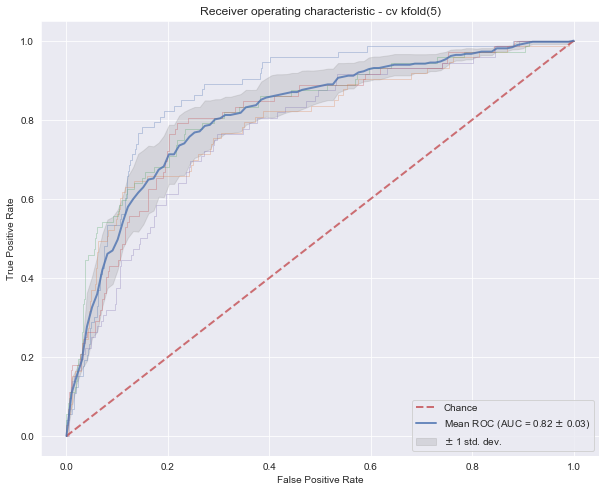

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs")

import my_classifier_metrics
ax, cm, metrics = my_classifier_metrics.cvClassifier(X_train, y_train, classifier, random_state=42)
plt.show()

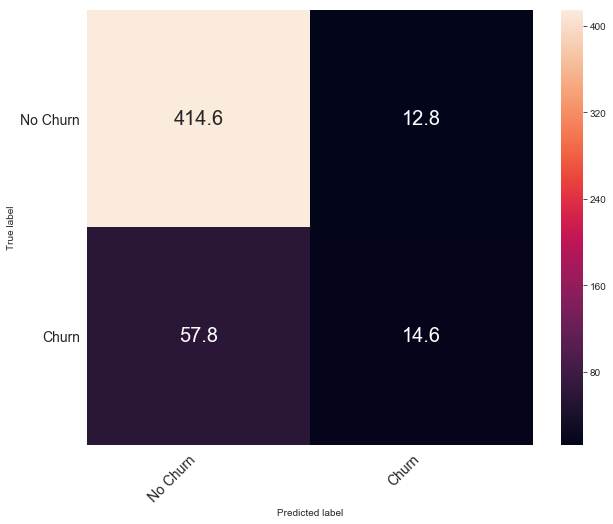

In [46]:
my_classifier_metrics.confusionMatrixPlot(cm, "Churn");

Accuracy: 92.44%
Precision: 89.50%
Recall:   54.14%
F1 score:   67.47%


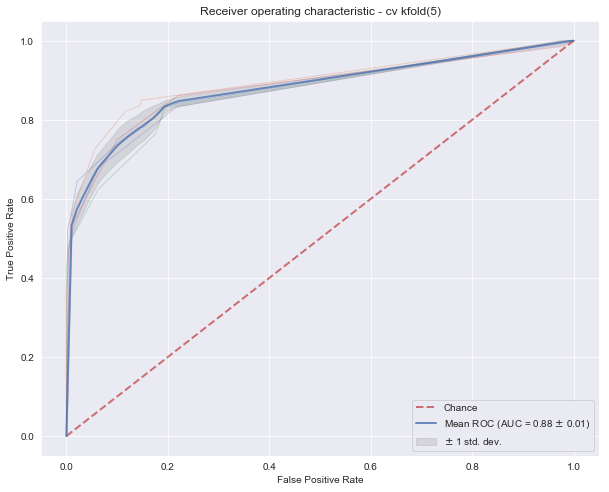

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)

ax, cm, metrics = my_classifier_metrics.cvClassifier(X_train, y_train, classifier, random_state=42)
plt.show()

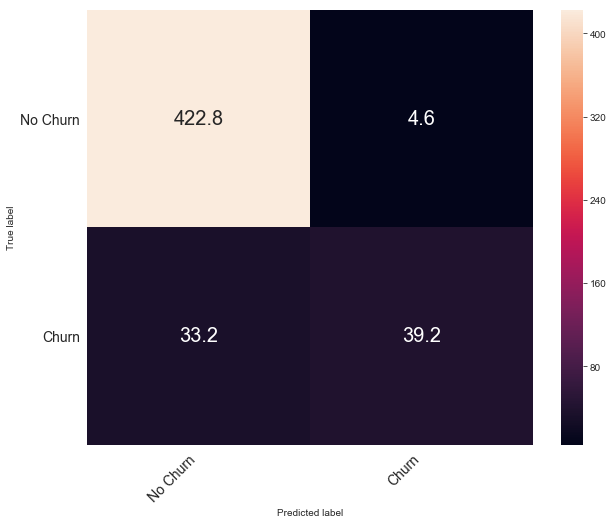

In [48]:
my_classifier_metrics.confusionMatrixPlot(cm, "Churn");

D:\opt\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\opt\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\opt\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\opt\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

Accuracy: 91.44%
Precision: 88.95%
Recall:   46.69%
F1 score:   61.23%


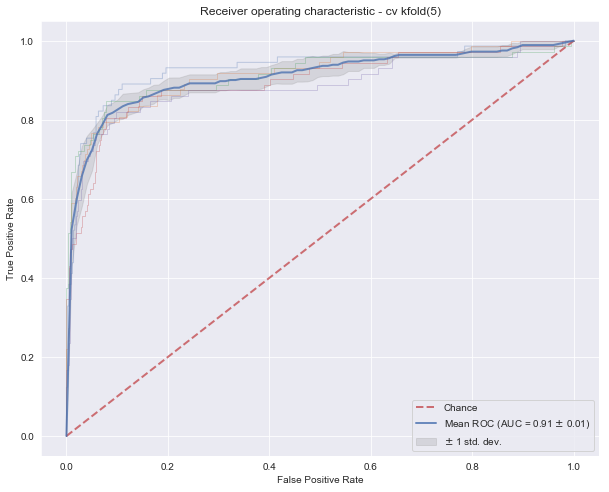

In [49]:
from sklearn.svm import SVC
classifier = SVC(random_state=42, probability=True)

ax, cm, metrics = my_classifier_metrics.cvClassifier(X_train, y_train, classifier, random_state=42)
plt.show()

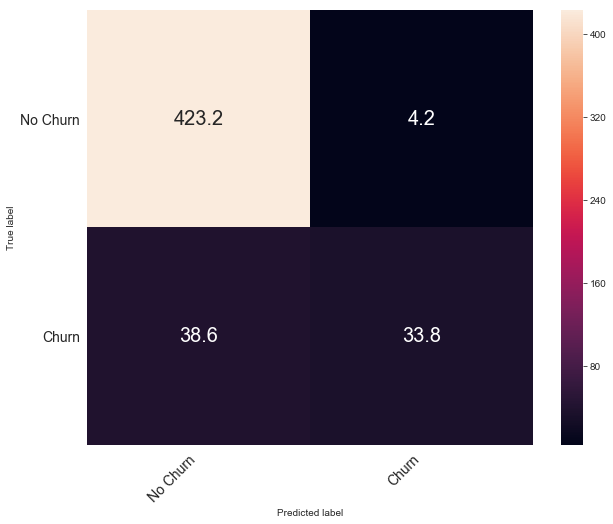

In [50]:
my_classifier_metrics.confusionMatrixPlot(cm, "Churn");